<a href="https://colab.research.google.com/github/ZarinSaima333/Brac-University/blob/main/CSE_428_Lab_4a_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('dataset1.csv')
print(df.shape)

(100, 2)


In [ ]:
df.head()

,x1,y
0,9.363503,37.889247
1,23.767858,93.576394
2,18.299849,73.658198
3,14.966462,49.928004
4,3.900466,14.503505


In [ ]:
X = df[['x1']].values
print(X.shape) # (n_samples, n_features)

y = df['y'].values
print(y.shape) # (n_samples,)

(100, 1)
(100,)


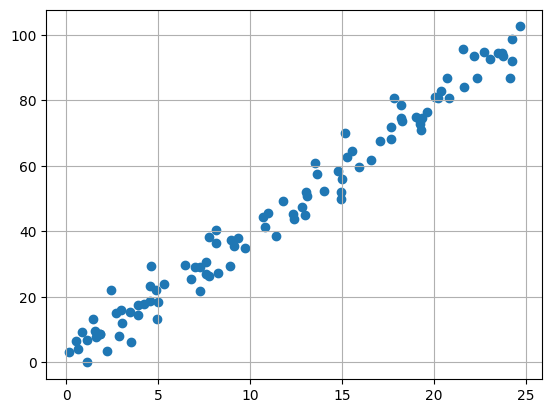

In [ ]:
plt.scatter(X,y)
plt.grid('on')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1867500)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (80, 1)
X_test shape: (20, 1)


(0.1380529280900599,
 24.67217341501293,
 -0.0743922801152088,
 102.59780801893828)

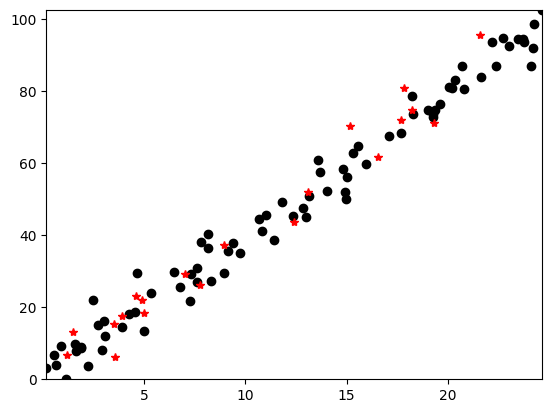

In [ ]:
plt.plot(X_train, y_train, "ko")
plt.plot(X_test, y_test, 'r*')

plt.axis([min(X), max(X), min(y), max(y)])

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)

theta0 = model.intercept_  ## c_hat
theta1 = model.coef_        ##  m_hat
print(theta0)
print(theta1)

1.1505712126468026
[3.88214221]


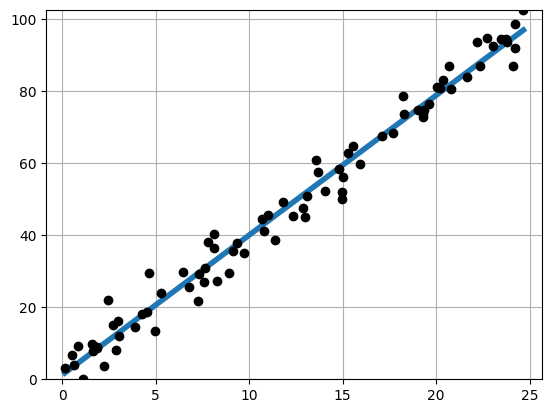

In [ ]:
xx = np.linspace(min(X), max(X), 100)
yy = theta0 + theta1*xx
plt.plot(xx, yy, lw=4)
plt.plot(X_train, y_train, 'ko')
plt.grid('on')
plt.axis([min(X)-1, max(X)+1, min(y), max(y)])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)

y_predicted = model.predict(X_test)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 18.02655997609268
Testing loss: 29.163636366403416


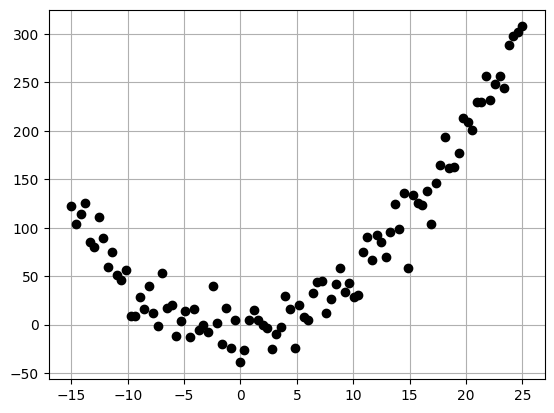

In [ ]:
df = pd.read_csv("dataset2_updated.csv")
X = df[['x']].values
y = df['y'].values

plt.plot(X, y, 'ko')
plt.grid('on')

In [ ]:
df.head(10)

,x,y
0,-15.000000,122.434283
1,-14.595960,103.755732
2,-14.191919,113.659056
3,-13.787879,125.513398
4,-13.383838,84.880497
5,-12.979798,79.554839
6,-12.575758,110.659096
7,-12.171717,89.424044
8,-11.767677,59.849621
9,-11.363636,75.417317


In [ ]:
df['x^2'] = df['x']**2
df.head()

,x,y,x^2
0,-15.000000,122.434283,225.000000
1,-14.595960,103.755732,213.042037
2,-14.191919,113.659056,201.410570
3,-13.787879,125.513398,190.105601
4,-13.383838,84.880497,179.127130


In [ ]:
X = df[['x', 'x^2']].values
y = df['y'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 2)
Shape of y: (100,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

-1.704377916080304
[-0.00720009  0.50638943]


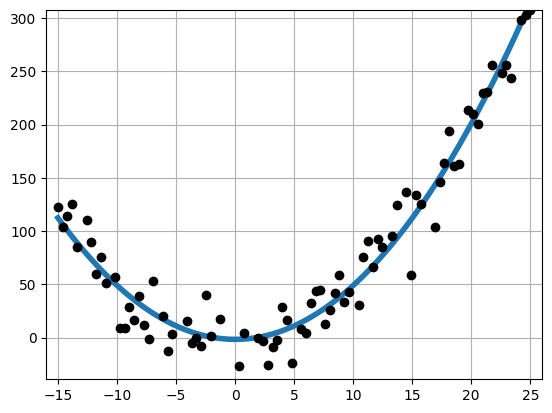

In [ ]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
yy = theta0 + theta1[0]*xx + theta1[1]*(xx**2)
plt.plot(xx, yy, lw=4)
plt.plot(X_train[:,0], y_train, 'ko')
plt.grid('on')
plt.axis([np.min(X[:,0])-1, np.max(X[:,0])+1, min(y), max(y)])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 355.1292268550744
Testing loss: 7937.215683159065


# A Real dataset

In [ ]:
#from sklearn.datasets import load_boston
#data = load_boston()
#data = datasets.load_boston()
#data.keys()

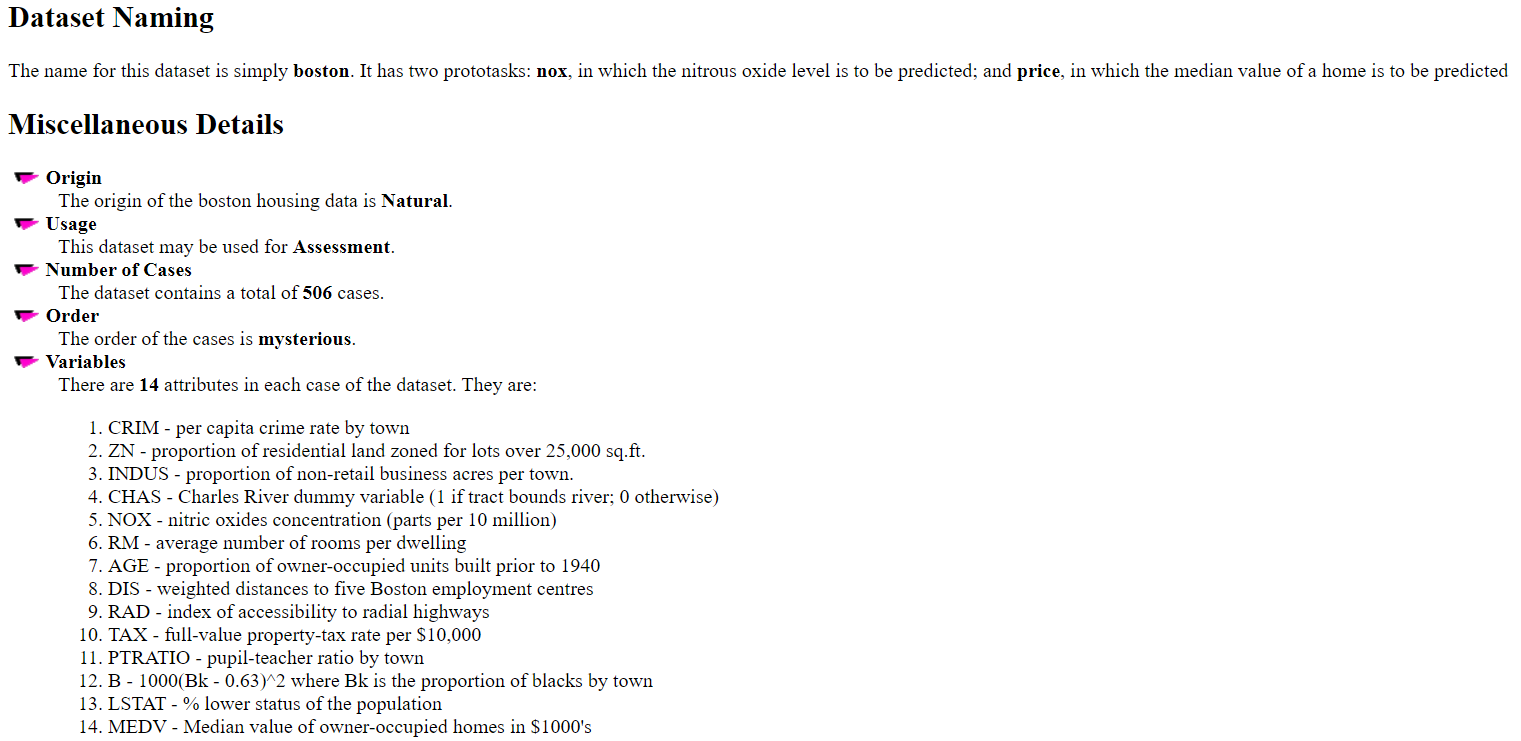

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# raw_df = raw_df.iloc[::2]

In [ ]:
# X = data['data']
# y = data['target']
X = data
y = target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
X[0,:], y[0,]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 24.0)

In [ ]:
#print(data['feature_names'])

In [ ]:
# print(data['DESCR'])

In [ ]:
for i in range(X.shape[-1]):
  print(min(X[:,i]),'---',max(X[:,i]))

0.00632 --- 88.9762
0.0 --- 100.0
0.46 --- 27.74
0.0 --- 1.0
0.385 --- 0.871
3.561 --- 8.78
2.9 --- 100.0
1.1296 --- 12.1265
1.0 --- 24.0
187.0 --- 711.0
12.6 --- 22.0
0.32 --- 396.9
1.73 --- 37.97


In [ ]:
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df.head()

In [ ]:
X_norm = preprocessing.minmax_scale(X)

In [ ]:
for i in range(X.shape[-1]):
  print(min(X_norm[:,i]),'---',max(X_norm[:,i]))

0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999999
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999998


In [ ]:
X = X_norm
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print("Testing loss:", mse_test)

Training loss: 21.649376911833603
Testing loss: 23.616994100563623


In [ ]:
theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

26.995592096303866
[ -7.25012431   4.80407782  -0.14926259   3.06260576  -7.8425244
  19.16652006  -0.82683103 -16.68678994   6.60723316  -6.35127813
  -8.68711112   3.78123489 -17.60885468]


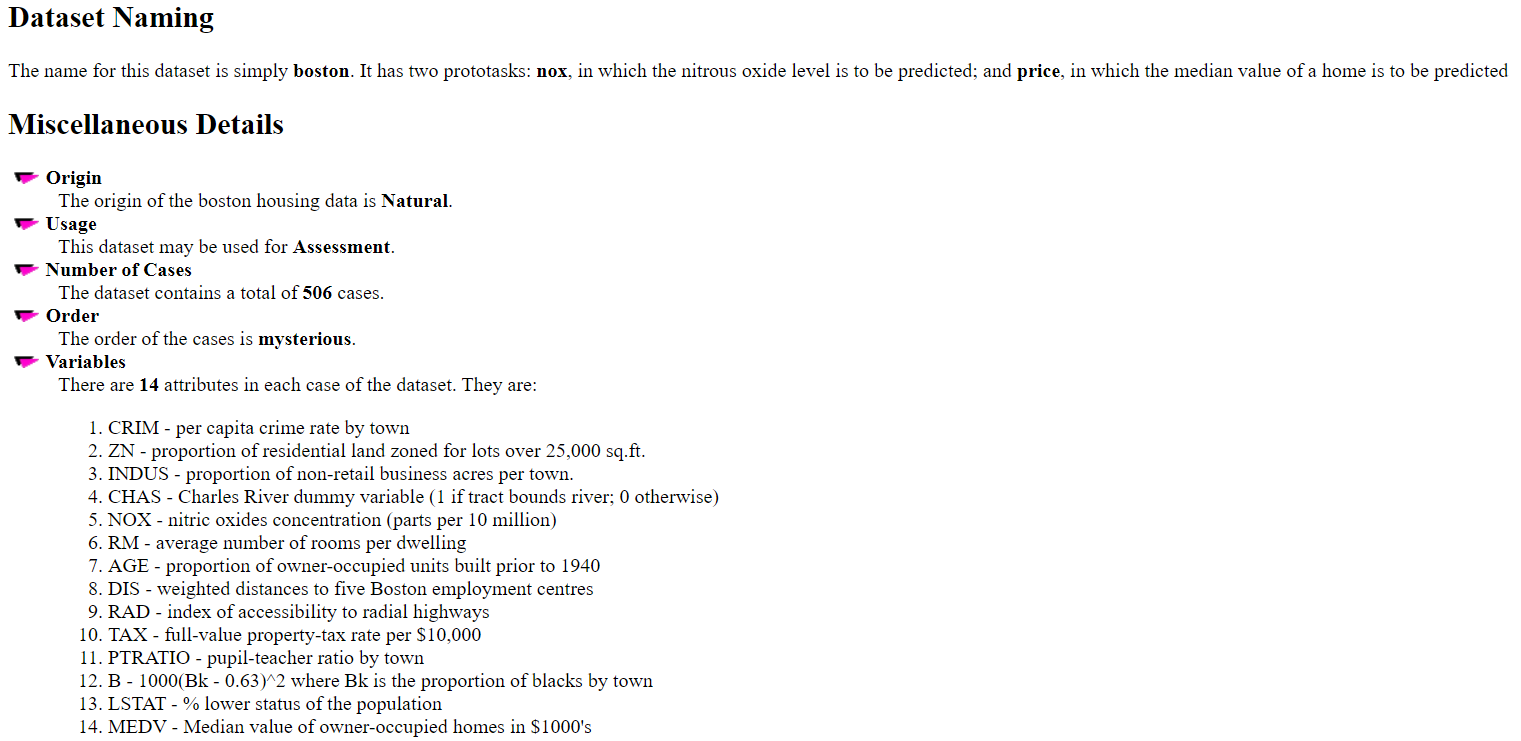